<a href="https://colab.research.google.com/github/VitalyGladyshev/DB_rep/blob/master/HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ДЗ 1

## Гладышев ВВ

## 1 Структура базы данных

Данные в исходных таблицах содержат пропуски и требуют дополнительной обработки. Исходя из предполагаемой логической структуры имеет смысл разделить на 3-4 таблицы. Для соответствия третьей нормальной форме можно создать таблицы:
- транзакций (transactions)
- товаров (products)
- потребителей (customers)

Дополнительно можно создать таблицу работ (однако при детальном изучении выяснильсь что в таком случае первичный ключ совпадёт по ширине с предполагаемой таблицей)

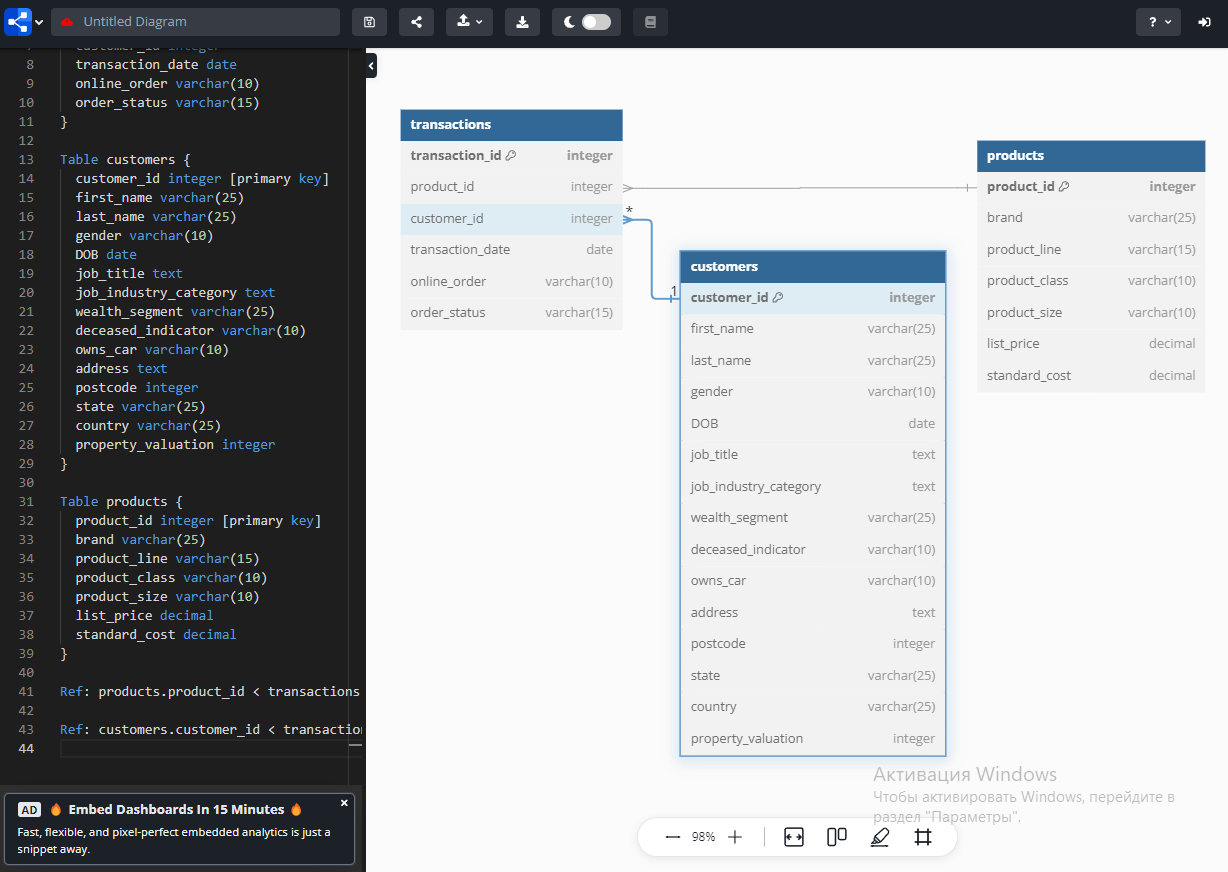

## 2 Нормализация базы данных

### Подготовка данных и разделение на таблицы

In [3]:
import pandas as pd

In [15]:
transactions = pd.read_csv("/content/transaction.csv")

In [16]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transaction_id    20000 non-null  int64  
 1   product_id        20000 non-null  int64  
 2   customer_id       20000 non-null  int64  
 3   transaction_date  20000 non-null  object 
 4   online_order      19640 non-null  object 
 5   order_status      20000 non-null  object 
 6   brand             19803 non-null  object 
 7   product_line      19803 non-null  object 
 8   product_class     19803 non-null  object 
 9   product_size      19803 non-null  object 
 10  list_price        20000 non-null  float64
 11  standard_cost     19803 non-null  float64
dtypes: float64(2), int64(3), object(7)
memory usage: 1.8+ MB


In [17]:
transactions.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost
0,1,2,2950,2-25-17,False,Approved,Solex,Standard,medium,medium,71.49,53.62
1,2,3,3120,5-21-17,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92
2,3,37,402,10-16-17,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82
3,4,88,3135,8-31-17,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10
4,5,78,787,10-01-17,True,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48


In [22]:
transactions.loc[transactions["online_order"].isnull(), "online_order"] = ""
transactions.loc[transactions["brand"].isnull(), "brand"] = ""
transactions.loc[transactions["product_line"].isnull(), "product_line"] = ""
transactions.loc[transactions["product_class"].isnull(), "product_class"] = ""
transactions.loc[transactions["product_size"].isnull(), "product_size"] = ""

In [23]:
transactions.loc[transactions["standard_cost"].isnull(), "standard_cost"] = transactions.loc[transactions["standard_cost"].isnull(), "list_price"]

In [91]:
transactions['transaction_date'] = pd.to_datetime(transactions['transaction_date'], format='%m-%d-%y')

In [100]:
transactions[transactions['product_id'] > 100]

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost


In [101]:
transactions[transactions['customer_id'] > 4000]

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost
8707,8708,0,5034,2017-10-07,False,Approved,Solex,Road,medium,medium,416.98,312.74
16700,16701,0,5034,2017-01-27,False,Approved,Norco Bicycles,Standard,medium,medium,360.40,270.30
17468,17469,0,5034,2017-01-03,False,Approved,OHM Cycles,Road,medium,medium,742.54,667.40


In [107]:
transactions.index[transactions['customer_id'] > 4000]

Index([8707, 16700, 17468], dtype='int64')

In [108]:
transactions.drop(transactions.index[transactions['customer_id'] > 4000], inplace=True)

In [109]:
transactions.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost
0,1,2,2950,2017-02-25,False,Approved,Solex,Standard,medium,medium,71.49,53.62
1,2,3,3120,2017-05-21,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92
2,3,37,402,2017-10-16,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82
3,4,88,3135,2017-08-31,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10
4,5,78,787,2017-10-01,True,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48


In [110]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19997 entries, 0 to 19999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   transaction_id    19997 non-null  int64         
 1   product_id        19997 non-null  int64         
 2   customer_id       19997 non-null  int64         
 3   transaction_date  19997 non-null  datetime64[ns]
 4   online_order      19997 non-null  object        
 5   order_status      19997 non-null  object        
 6   brand             19997 non-null  object        
 7   product_line      19997 non-null  object        
 8   product_class     19997 non-null  object        
 9   product_size      19997 non-null  object        
 10  list_price        19997 non-null  float64       
 11  standard_cost     19997 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(3), object(6)
memory usage: 2.0+ MB


### Таблица транзакций

In [111]:
transactions_table = transactions[["transaction_id", "product_id", "customer_id", "transaction_date", "online_order", "order_status"]]

In [112]:
transactions_table.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19997 entries, 0 to 19999
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   transaction_id    19997 non-null  int64         
 1   product_id        19997 non-null  int64         
 2   customer_id       19997 non-null  int64         
 3   transaction_date  19997 non-null  datetime64[ns]
 4   online_order      19997 non-null  object        
 5   order_status      19997 non-null  object        
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 1.1+ MB


In [113]:
transactions_table.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status
0,1,2,2950,2017-02-25,False,Approved
1,2,3,3120,2017-05-21,True,Approved
2,3,37,402,2017-10-16,False,Approved
3,4,88,3135,2017-08-31,False,Approved
4,5,78,787,2017-10-01,True,Approved


In [114]:
transactions_table.to_csv("transactions_table.csv")

### Таблица товаров

In [41]:
products_table = transactions[["product_id", "brand", "product_line", "product_class", "product_size", "list_price", "standard_cost"]]

In [42]:
products_table.head()

,product_id,brand,product_line,product_class,product_size,list_price,standard_cost
0,2,Solex,Standard,medium,medium,71.49,53.62
1,3,Trek Bicycles,Standard,medium,large,2091.47,388.92
2,37,OHM Cycles,Standard,low,medium,1793.43,248.82
3,88,Norco Bicycles,Standard,medium,medium,1198.46,381.10
4,78,Giant Bicycles,Standard,medium,large,1765.30,709.48


In [43]:
products_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   product_id     20000 non-null  int64  
 1   brand          20000 non-null  object 
 2   product_line   20000 non-null  object 
 3   product_class  20000 non-null  object 
 4   product_size   20000 non-null  object 
 5   list_price     20000 non-null  float64
 6   standard_cost  20000 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 1.1+ MB


In [44]:
products_table["product_id"].unique()

array([  2,   3,  37,  88,  78,  25,  22,  15,  67,  12,   5,  61,  35,
        16,  79,  33,  54,  27,  82,  89,  64,  19,  72,  91,   1,  99,
         0,  92,  14,  44,  76,  46,  55,  66,  81,  86,  32,  77,  96,
         6,  47,  94,  93,  60,  28,   4,  38,  56,  58,  50,  80,  87,
        84,  21,  31,  62,  17,  73,  45,  49,  95,  18,  70,  26,  39,
        36,  98,  75,  42,  20,  24,  53,  65,  29,  11,  10,   7,  41,
         9,  69,  90,  97, 100,  74,  71,  34,  57,  23,  51,  59,  63,
        40,   8,  13,  30,  48,  68,  83,  43,  52,  85])

In [45]:
len(products_table["product_id"].unique())

101

In [46]:
products_table = products_table.drop_duplicates()

In [48]:
products_table.info()

<class 'pandas.core.frame.DataFrame'>
Index: 397 entries, 0 to 19871
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   product_id     397 non-null    int64  
 1   brand          397 non-null    object 
 2   product_line   397 non-null    object 
 3   product_class  397 non-null    object 
 4   product_size   397 non-null    object 
 5   list_price     397 non-null    float64
 6   standard_cost  397 non-null    float64
dtypes: float64(2), int64(1), object(4)
memory usage: 24.8+ KB


In [49]:
products_table.to_csv("products_table.csv")

In [79]:
customers = pd.read_csv("/content/customer.csv")

In [80]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   customer_id            4000 non-null   int64 
 1   first_name             4000 non-null   object
 2   last_name              3875 non-null   object
 3   gender                 4000 non-null   object
 4   DOB                    3913 non-null   object
 5   job_title              3494 non-null   object
 6   job_industry_category  3344 non-null   object
 7   wealth_segment         4000 non-null   object
 8   deceased_indicator     4000 non-null   object
 9   owns_car               4000 non-null   object
 10  address                4000 non-null   object
 11  postcode               4000 non-null   int64 
 12  state                  4000 non-null   object
 13  country                4000 non-null   object
 14  property_valuation     4000 non-null   int64 
dtypes: int64(3), object(1

In [81]:
customers.head()

,customer_id,first_name,last_name,gender,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,address,postcode,state,country,property_valuation
0,1,Laraine,Medendorp,F,19644,Executive Secretary,Health,Mass Customer,N,Yes,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,Eli,Bockman,Male,29571,Administrative Officer,Financial Services,Mass Customer,N,Yes,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,3,Arlin,Dearle,Male,19744,Recruiting Manager,Property,Mass Customer,N,Yes,0 Holy Cross Court,4211,QLD,Australia,9
3,4,Talbot,NaN,Male,22557,NaN,IT,Mass Customer,N,No,17979 Del Mar Point,2448,New South Wales,Australia,4
4,5,Sheila-kathryn,Calton,Female,28258,Senior Editor,NaN,Affluent Customer,N,Yes,9 Oakridge Court,3216,VIC,Australia,9


In [82]:
customers.loc[customers["last_name"].isnull(), "last_name"] = ""
customers.loc[customers["DOB"].isnull(), "DOB"] = 0
customers.loc[customers["job_title"].isnull(), "job_title"] = "unknown"
customers.loc[customers["job_industry_category"].isnull(), "job_industry_category"] = "unknown"

In [84]:
# customers.loc[customers['DOB'] == '1843-12-21', 'DOB'] = 0
customers.loc[customers["DOB"] != '1843-12-21', "DOB"] = pd.to_datetime(customers.loc[customers["DOB"] != '1843-12-21', "DOB"].astype(int) - 2, unit='D', origin='1899-12-30')

In [85]:
customers.head()

,customer_id,first_name,last_name,gender,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,address,postcode,state,country,property_valuation
0,1,Laraine,Medendorp,F,1953-10-10 00:00:00,Executive Secretary,Health,Mass Customer,N,Yes,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,Eli,Bockman,Male,1980-12-14 00:00:00,Administrative Officer,Financial Services,Mass Customer,N,Yes,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,3,Arlin,Dearle,Male,1954-01-18 00:00:00,Recruiting Manager,Property,Mass Customer,N,Yes,0 Holy Cross Court,4211,QLD,Australia,9
3,4,Talbot,,Male,1961-10-01 00:00:00,unknown,IT,Mass Customer,N,No,17979 Del Mar Point,2448,New South Wales,Australia,4
4,5,Sheila-kathryn,Calton,Female,1977-05-11 00:00:00,Senior Editor,unknown,Affluent Customer,N,Yes,9 Oakridge Court,3216,VIC,Australia,9


In [86]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   customer_id            4000 non-null   int64 
 1   first_name             4000 non-null   object
 2   last_name              4000 non-null   object
 3   gender                 4000 non-null   object
 4   DOB                    4000 non-null   object
 5   job_title              4000 non-null   object
 6   job_industry_category  4000 non-null   object
 7   wealth_segment         4000 non-null   object
 8   deceased_indicator     4000 non-null   object
 9   owns_car               4000 non-null   object
 10  address                4000 non-null   object
 11  postcode               4000 non-null   int64 
 12  state                  4000 non-null   object
 13  country                4000 non-null   object
 14  property_valuation     4000 non-null   int64 
dtypes: int64(3), object(1

In [88]:
customers.to_csv("customers_r_table.csv")

### Таблица клиентов

In [54]:
customers_table = customers.drop(labels="job_industry_category", axis=1)

In [57]:
customers_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         4000 non-null   int64 
 1   first_name          4000 non-null   object
 2   last_name           4000 non-null   object
 3   gender              4000 non-null   object
 4   DOB                 4000 non-null   object
 5   job_title           4000 non-null   object
 6   wealth_segment      4000 non-null   object
 7   deceased_indicator  4000 non-null   object
 8   owns_car            4000 non-null   object
 9   address             4000 non-null   object
 10  postcode            4000 non-null   int64 
 11  state               4000 non-null   object
 12  country             4000 non-null   object
 13  property_valuation  4000 non-null   int64 
dtypes: int64(3), object(11)
memory usage: 437.6+ KB


In [55]:
len(customers_table["customer_id"].unique())

4000

In [56]:
customers_table.to_csv("customers_table.csv")

### Таблица видов работ

In [58]:
job_table = customers[["job_title", "job_industry_category"]]

In [59]:
len(job_table["job_title"].unique())

196

In [60]:
job_table = job_table.drop_duplicates()

In [65]:
job_table.loc[(job_table["job_title"] != "unknown")]

,job_title,job_industry_category
0,Executive Secretary,Health
1,Administrative Officer,Financial Services
2,Recruiting Manager,Property
4,Senior Editor,unknown
7,Media Manager I,unknown
...,...,...
3953,Human Resources Assistant III,Financial Services
3954,Geologist II,Argiculture
3961,Project Manager,Argiculture
3984,Web Developer IV,Property


In [66]:
job_table.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1049 entries, 0 to 3987
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   job_title              1049 non-null   object
 1   job_industry_category  1049 non-null   object
dtypes: object(2)
memory usage: 24.6+ KB


In [67]:
job_table.to_csv("job_table.csv")

## 3 Создание таблиц

В интерфейсе DBeaver создадим базу данных и таблицы
```sql
CREATE TABLE customers (
  customer_id integer PRIMARY KEY,
  first_name varchar(25),
  last_name varchar(25),
  gender varchar(10),
  DOB date,
  job_title text,
  job_industry_category text,
  wealth_segment varchar(25),
  deceased_indicator varchar(10),
  owns_car varchar(10),
  address text,
  postcode integer,
  state varchar(25),
  country varchar(25),
  property_valuation integer
);

CREATE TABLE products (
  product_id integer PRIMARY KEY,
  brand varchar(25),
  product_line varchar(15),
  product_class varchar(10),
  product_size varchar(10),
  list_price decimal,
  standard_cost decimal
);

CREATE TABLE transactions (
  transaction_id integer PRIMARY KEY,
  product_id integer,
  customer_id integer,
  transaction_date date,
  online_order varchar(10),
  order_status varchar(15),
  FOREIGN KEY (product_id) REFERENCES products(product_id),
  FOREIGN KEY (customer_id) REFERENCES customers(customer_id)
);
```

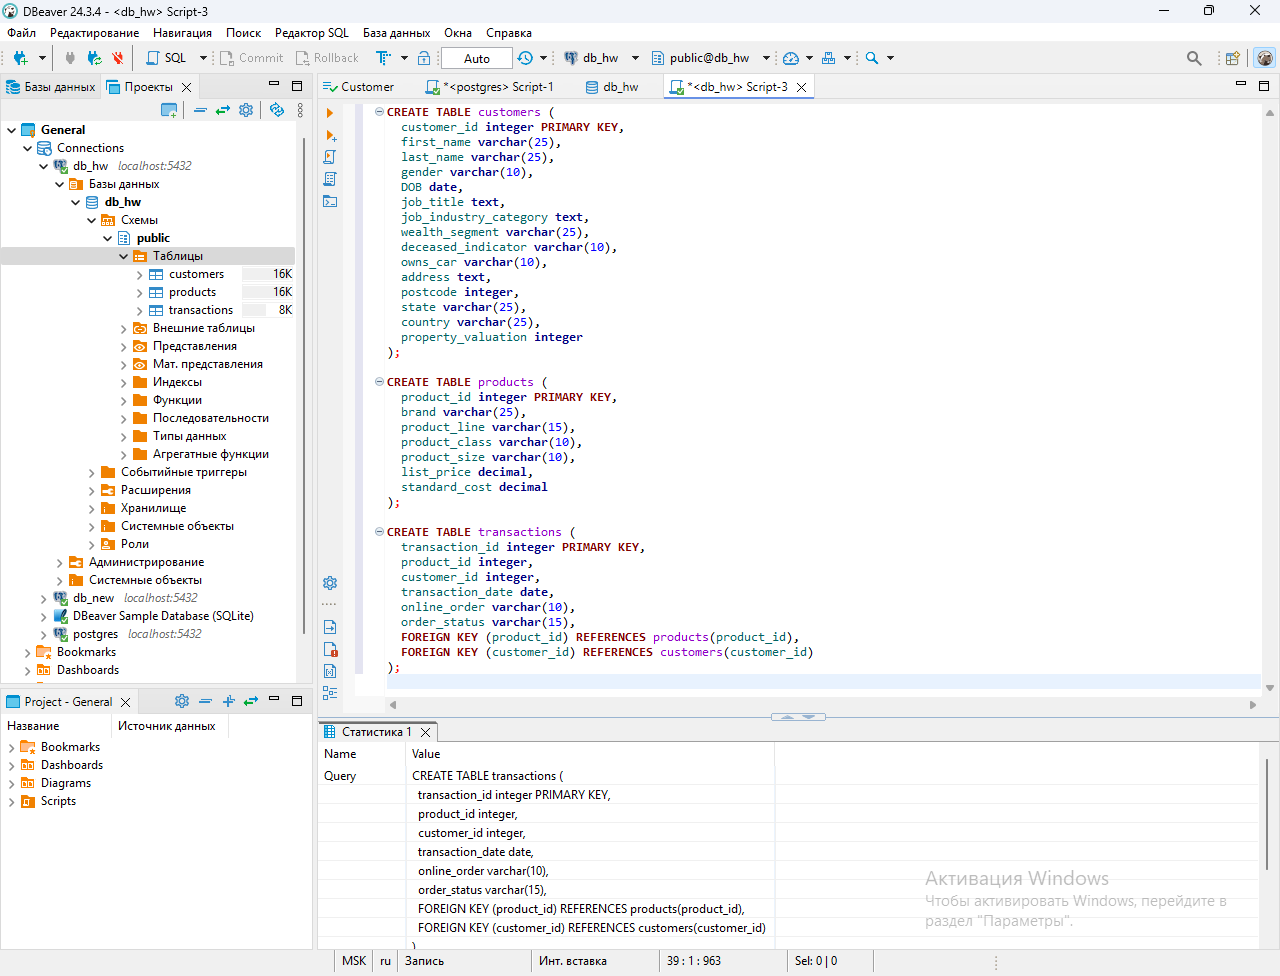

## 4 Загрузка данных

#### Таблица клиентов

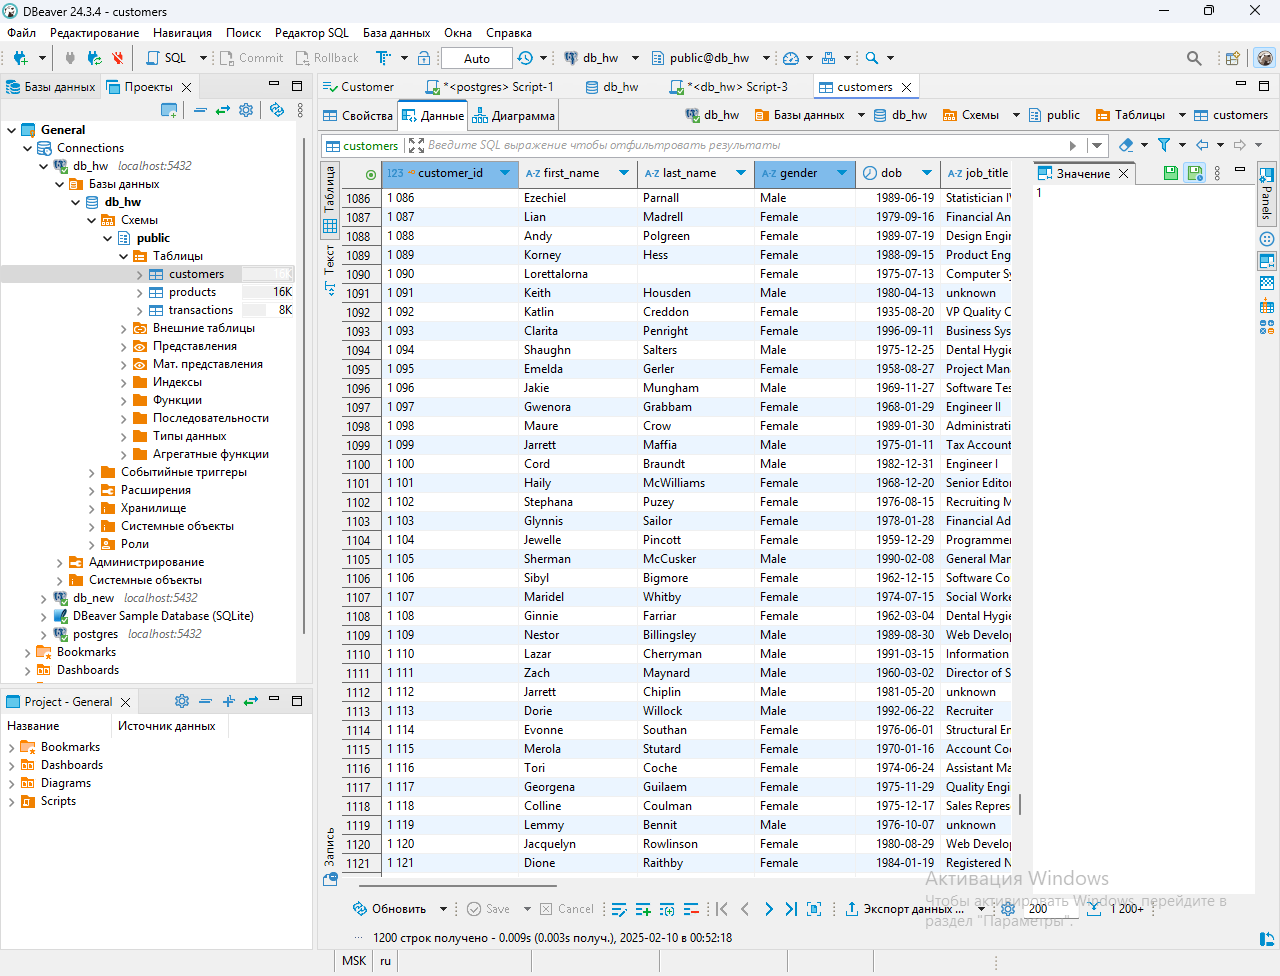

#### Таблица товаров

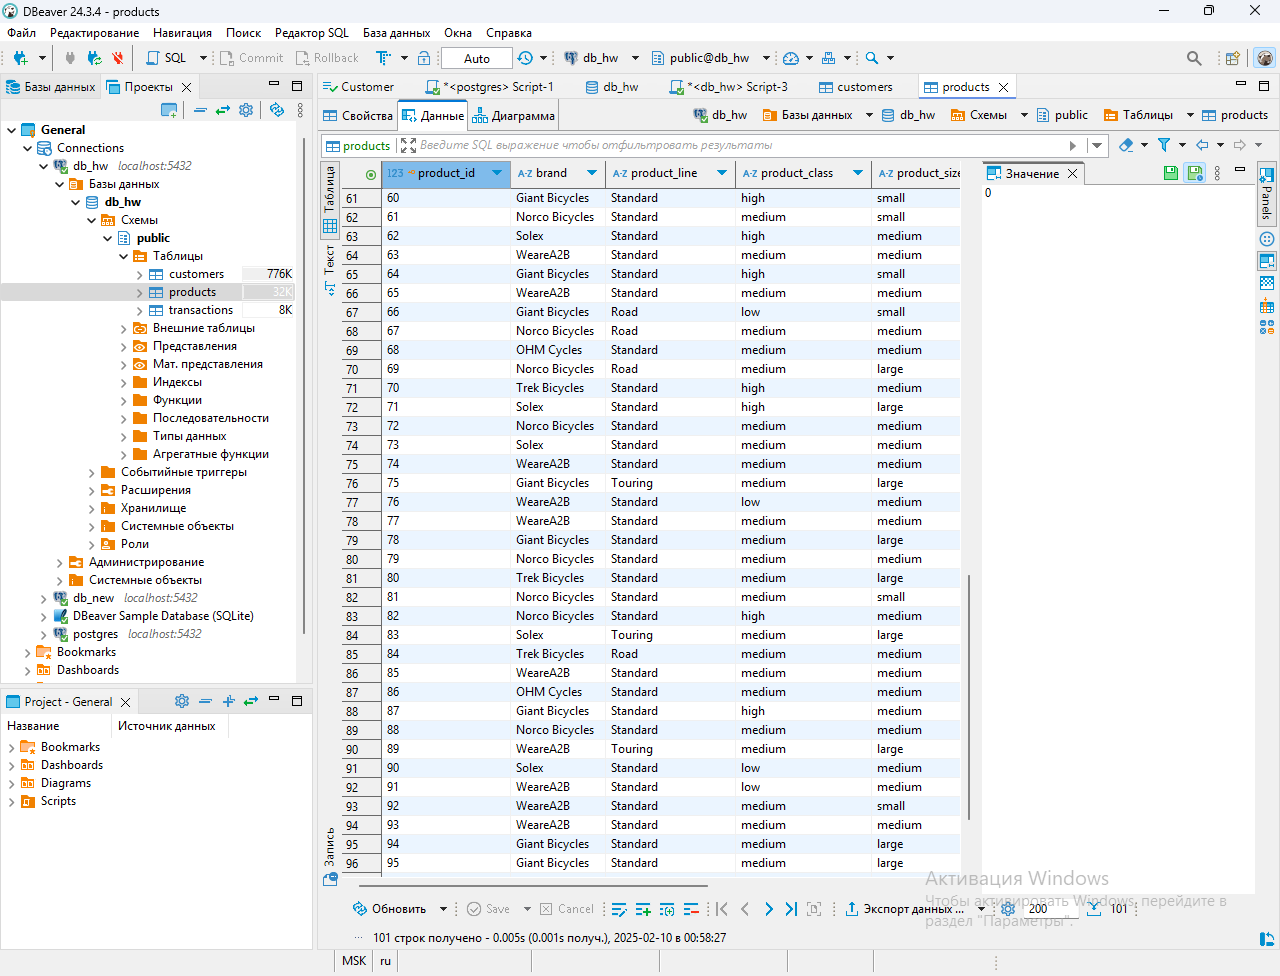

#### Таблица транзакций

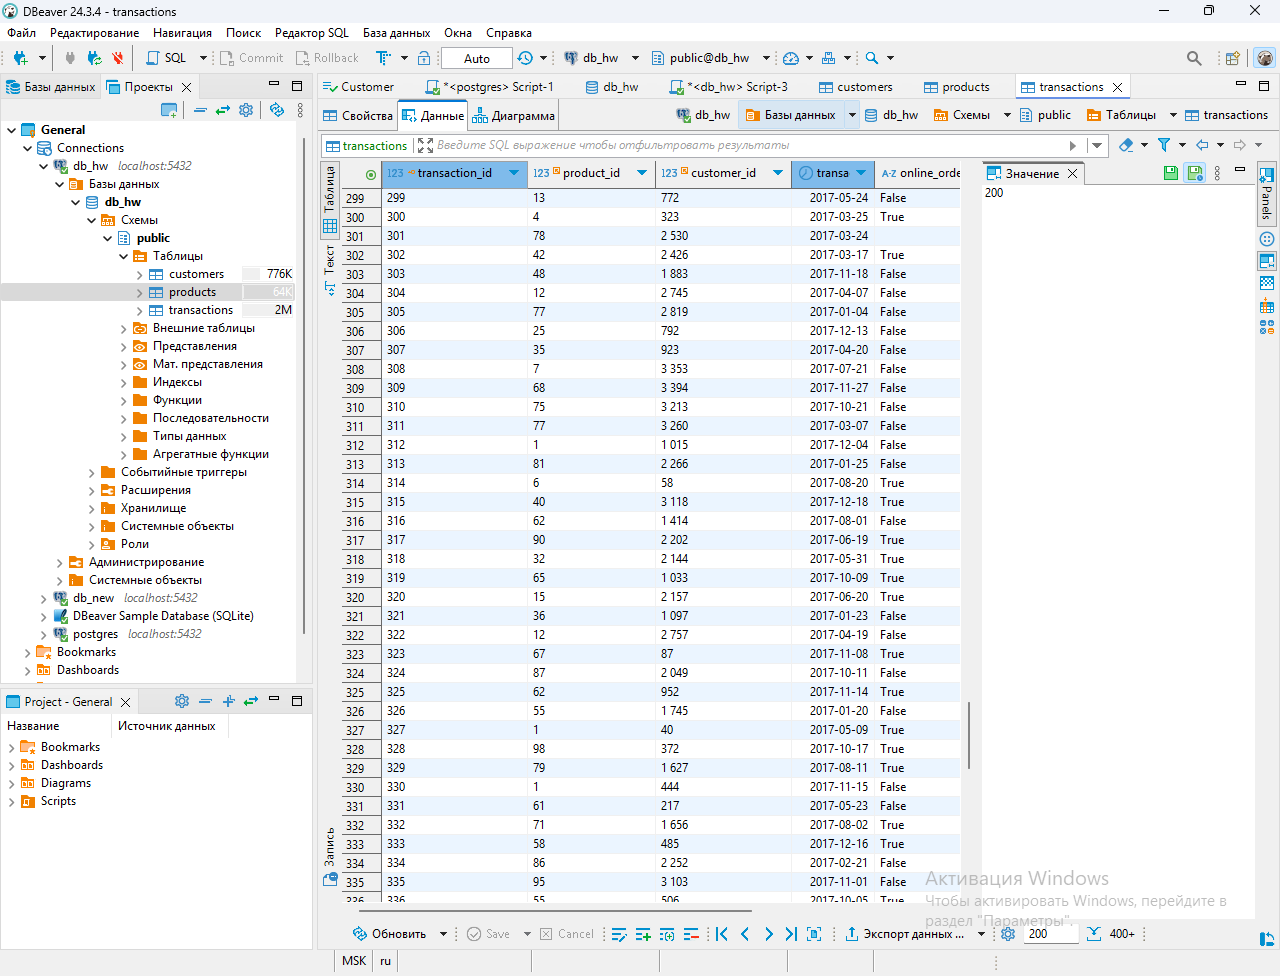